# Welcome to rfpfolio

> Generate historical return data for portfolios, with rebalancing.

This Python package is designed to solve a simple problem: examining the historical performance of a portfolio of assets with a specified, fixed weighting for each asset, and periodic rebalancing to the specified weighting.

You can get a good understanding of the value of this by browsing the information and graphics at https://portfoliocharts.com/

Using this package, you can perform portfolio analysis using your own data, and are not restricted to choices available at portfoliocharts.com. This is useful if you are interested in exploring portfolios that include alternative asset classes, equity allocations to a particular set of stocks, or allocations to some dynamic strategy (for which you have separately procured or generated data.)

The most common application for this Python package is to import it into a Jupyter notebook, use it to generate portfolio returns for an asset weighting of interest, and then use other tools for analyzing and plotting the portfolio returns.

## Install

Clone this repo to your machine. Navigate your shell to the cloned repo's root directory and run:

```
pip install .
```
or:
```
python setup.py install
```

## How to use

### Specify a source for your data

The supported format is Yahoo Finance csv, and the code currently only reads the `Date` and `Adj Close` columns.

The data root directory specified to PriceSource contains your data, with one or more subdirectories (daily, weekly, monthly)
for asset data series of different frequencies.

```
+ <data_root>
|--+ weekly
|  |--+ GLD.csv
|  |--+ IEI.csv
|  |--+ SPY.csv
|
|--+ daily
      :
 ```
 
 Here is how to specify the root directory for your data:

In [ ]:
import rfpfolio as rfp

tst_src = rfp.PriceSource('testdata/2017-Apr')

Let's take a peek at the data. The data should be a sequence of "adjusted prices" (adjusted for, say, dividends and stock splits). This means that the true ending value of an investment in the asset over some period is given by the adjusted price at the end of the period, divided by the beginning adjusted price, all multiplied by the initial investment.

In [ ]:
price_data = tst_src.loadAllAdjustedPrices(['SPY', 'IEI', 'GLD'], subdir='weekly')
price_data.head()

,SPY,IEI,GLD
Date,,,
2017-04-03,220.896225,115.845558,119.459999
2017-04-10,218.369843,116.867851,122.599998
2017-04-17,220.323349,116.943314,122.309998
2017-04-24,223.601120,116.688652,120.769997
2017-05-01,225.122589,116.301956,117.010002


### Compute portfolio returns

For example, compute returns for a portfolio consisting of 40% large U.S. stocks (SPY), 40% U.S. Treasury bonds (IEI), and 20% gold (GLD), rebalanced every four weeks.

In [ ]:
portfolio_1_weights = {'SPY': 0.4, 'IEI': 0.4, 'GLD': 0.2}
pf_1_returns = rfp.computePortfolioReturns(tst_src, portfolio_1_weights, "Portfolio_1", rebal_period=4, 
                                           period='weekly', start_date='2017-05-01')

In [ ]:
pf_1_returns.head()

,Portfolio_1
Date,
2017-05-01,-0.004831
2017-05-08,-0.000385
2017-05-15,0.004611
2017-05-22,0.007605
2017-05-29,0.006685


### Analyze the returns

In [ ]:
#hide
# importing empyrical throws a warning; ignore it
import warnings; warnings.simplefilter('ignore')

For example, here we can use some of the metrics from the *empyrical* package to assess the performance of this portfolio over the study period.

In [ ]:
import empyrical.stats as estats
import pandas as pd

In [ ]:
period='weekly'

stats_spec = {'Annual Return':lambda x:estats.annual_return(x, period),
              'Max Drawdown':estats.max_drawdown,
              'Annual Volatility':lambda x: estats.annual_volatility(x, period), 
              'Sharpe Ratio':lambda x: estats.sharpe_ratio(x, period=period)}

stats = [f(pf_1_returns['Portfolio_1']) for f in stats_spec.values()]

pd.DataFrame({'Portfolio_1': stats}, index=stats_spec.keys())

,Portfolio_1
Annual Return,0.085432
Max Drawdown,-0.138613
Annual Volatility,0.090113
Sharpe Ratio,0.955435


Plot the cumulative returns of the portfolio.

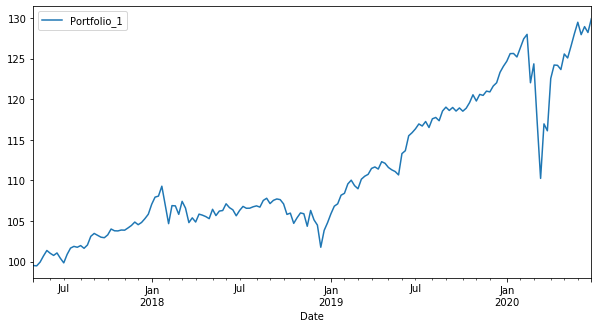

In [ ]:
cum_returns2 = estats.cum_returns(pf_1_returns, 100)
cum_returns2.plot.line(figsize=(10,5));

## License

Copyright 2020 Richard A. Froom. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this project's files except in compliance with the License. A copy of the License is provided in the LICENSE file in this repository.